#pre-modeling

##Dependencies

In [1331]:
!pip install tensorflow
!pip install shap

In [1332]:
from google.colab import drive
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

## setup

In [1333]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1334]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [1335]:
!pip install xport

In [1336]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


##PFAS dataframe

In [1337]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [1338]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


##making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [1339]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [1340]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [1341]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81,
 'LBDVTPLC': 0.03,
 'LBDVVBLC': 0.0,
 'LBDVXYLC': 63.52,
 

In [1342]:
len(d_p)

131

In [1343]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [1344]:
type(d_p)
L2=np.array(list(d_p.items()))

##Decide which we can treat as binary


In [1345]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 25 or val >= 75)}

In [1346]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [1347]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [1348]:
len(binary_list)

17

In [1349]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,LBDBSELC,LBDBMNLC,LBDFORLC,URDDEELC,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1350]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

In [1351]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [1352]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

##which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [1353]:
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [1354]:
print(len(intersection_list))

0


In [1355]:
intersection_list

[]

In [1356]:
#percentage of what is binary in df
len(intersection_list)/len(df_PFAS)*100

0.0

In [1357]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [1358]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

0

In [1359]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_PFAS=df_PFAS.drop(columns=cols_to_drop)

##taking log of continuous values

In [1360]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = df_PFAS.columns[df_PFAS.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in df_PFAS.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    df_PFAS[col] = np.log(df_PFAS[col])

In [1361]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,-1.609438,0.0,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.302585,0.0,-2.659260,1.0
1,73571.0,-1.203973,0.0,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,0.262364,0.0,-2.659260,1.0,-2.659260,1.0
2,73574.0,-2.302585,0.0,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.356675,0.0,-2.659260,1.0,-2.659260,1.0
3,73576.0,-1.609438,0.0,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,-0.510826,0.0,-2.659260,1.0,-2.302585,0.0
4,73577.0,-2.302585,0.0,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.916291,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,-2.659260,1.0,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-1.203973,0.0,-2.659260,1.0,-2.659260,1.0
2334,83712.0,-1.609438,0.0,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
2335,83713.0,-0.105361,0.0,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,0.405465,0.0,-0.693147,0.0,-1.203973,0.0
2336,83717.0,-1.609438,0.0,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.223144,0.0,-2.659260,1.0,-2.659260,1.0


##Splitting the data
We are trying to predict detection level of 2-(N-methyl-PFOSA) acetate (ug/L)



In [1362]:
from sklearn.model_selection import train_test_split
leftover, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
train, dev =train_test_split(leftover, test_size=0.2)
X_train=train.drop(columns=['LBDMPAHL','LBXMPAH'])
X_dev=dev.drop(columns=['LBDMPAHL','LBXMPAH'])
X_test=test.drop(columns=['LBDMPAHL','LBXMPAH'])
Y_train=train['LBXMPAH']
Y_test=test['LBXMPAH']
Y_dev=dev['LBXMPAH']

In [1363]:
include=list(X_train.columns)

In [1364]:
Y_test

641    -0.356675
1448   -2.659260
1968   -1.203973
1019   -1.203973
2037   -2.659260
          ...   
1249    1.840550
2067   -2.302585
1529   -2.659260
389    -2.302585
686    -2.659260
Name: LBXMPAH, Length: 434, dtype: float64

##Scaled training, development, testing

In [1365]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_dev_scaled = sc.fit_transform(X_dev)

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [1366]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

In [1367]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.0
R squared dev set -0.00134545703977218
MSE training set 0.5999713030500023
MSE dev set 0.5950199540148956
RMSE training set 0.7745781452184165
RMSE dev set 0.7713753651853912


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


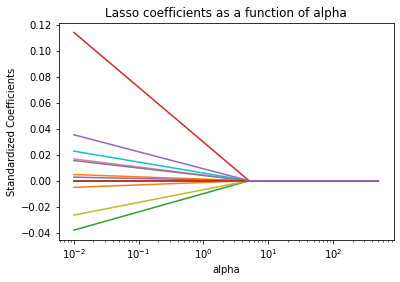

In [1368]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [1369]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [1370]:
model_lasso.alpha_


0.018700380661898105

In [1371]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.018700380661898105)

In [1372]:
Lasso(alpha=model_lasso.alpha_)

Lasso(alpha=0.018700380661898105)

In [1373]:
print(list(zip(lasso_best.coef_, X_train_scaled)))

[(0.0, array([ 1.27123065,  0.90590898, -0.5186371 , -0.78979099, -0.12095693,
       -0.07505929,  0.08521833, -0.29711699,  0.37249437,  0.53832881,
       -0.11466596,  1.50288513, -1.14359971, -0.38236509,  0.45281243])), (0.0, array([ 0.85111788,  3.13690153, -0.5186371 , -3.05188355,  8.26740588,
       -0.07505929,  0.08521833, -0.29711699,  0.37249437, -3.13766648,
        8.72098363, -0.64378734,  0.87443184, -0.38236509,  0.45281243])), (-0.033397355189306706, array([-0.94912165, -0.74640901, -0.5186371 ,  0.02430279, -0.12095693,
       -0.07505929,  0.08521833, -0.29711699,  0.37249437,  0.22986908,
       -0.11466596, -0.64378734,  0.87443184, -0.38236509,  0.45281243])), (0.10847546119257064, array([ 1.40740043,  2.3990715 , -0.5186371 , -0.25194127, -0.12095693,
       -0.07505929,  0.08521833, -0.29711699,  0.37249437,  1.18803253,
       -0.11466596,  2.63140534, -1.14359971,  3.01756617, -2.20841994])), (0.0, array([-1.75044154, -0.74640901, -0.5186371 , -1.94652292, 

In [1374]:
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [1375]:
y_pred

array([-2.20766753, -2.42413001, -1.99788704, -2.0476429 , -2.15548914,
       -2.06901337, -2.27059454, -2.18837193, -2.25421048, -1.97136829,
       -2.22760913, -2.26929648, -2.11195989, -2.12657757, -2.0606793 ,
       -2.16383296, -2.12316931, -1.83857712, -1.78905549, -1.98368231,
       -2.00193984, -1.95865735, -2.28510386, -2.08137532, -2.18208709,
       -2.11120979, -2.05007959, -1.88669791, -2.1573671 , -2.12656366,
       -1.99805315, -2.46421304, -2.70608532, -2.03700281, -1.9891101 ,
       -2.11790941, -2.19296095, -2.06257731, -1.98130299, -2.08836328,
       -2.28007997, -2.29067932, -2.0954217 , -2.18953937, -1.90331993,
       -2.09631358, -2.21951158, -2.16382507, -2.12190672, -2.26929648,
       -2.07978759, -2.26836411, -2.24349182, -1.97161917, -2.20776274,
       -2.16797014, -2.1960139 , -2.21841614, -2.08258352, -2.26096054,
       -2.07066548, -2.1960139 , -2.06299676, -2.12548276, -2.23515589,
       -1.96172219, -1.92085602, -2.15935837, -2.05151213, -2.05

In [1376]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.0419669501225185
R squared test set 0.04704968153230016
MSE training set 0.5747923372999605
MSE test set 0.6051960173673075
RMSE training set 0.7581506033104244
RMSE test set 0.7779434538366574


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


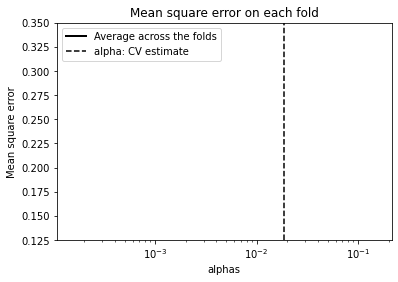

In [1377]:
plt.semilogx(model_lasso.alphas_, model_lasso.mse_path_, ":")
plt.plot(
    model_lasso.alphas_ ,
    model_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.125, 0.35
plt.ylim(ymin, ymax);

In [1378]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
760,-2.659260,-2.024331
1340,-2.659260,-2.266393
1083,-2.659260,-2.132992
271,-2.659260,-2.265951
72,-2.659260,-2.254495
...,...,...
1897,0.470004,-2.122376
1653,0.587787,-1.992497
1773,0.832909,-2.102291
372,1.131402,-2.140335


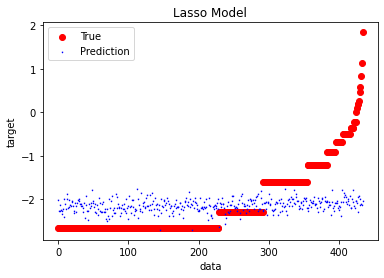

In [1379]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso Model")
plt.legend()
plt.show()

#Decision Tree Regression

[Python | Decision Tree Regression using sklearn](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

In [1380]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_dev)

to be able to plot the results we need to make sure the results are on the same index so they match up

In [1381]:
list(X_dev.index)==list(Y_dev.index)

True

In [1382]:
y_pred_series=pd.Series(y_pred,index=X_dev.index)
list(y_pred_series.index)==list(Y_dev.index)

True

In [1383]:
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=test_Df.sort_values(by=['Actual'])
dev_Df

,Actual,Prediction
760,-2.659260,-2.024331
2218,-2.659260,-2.001948
1689,-2.659260,-2.307672
2246,-2.659260,-2.159358
686,-2.659260,-2.175574
...,...,...
1897,0.470004,-2.122376
1653,0.587787,-1.992497
1773,0.832909,-2.102291
372,1.131402,-2.140335


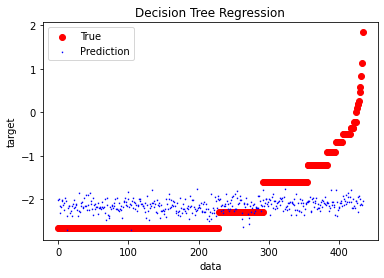

In [1384]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [1385]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 1.0
R squared dev set -1.372924815856107
MSE training set 0.0
MSE dev set 1.4100404659402423
RMSE training set 0.0
RMSE dev set 1.1874512478161967


[Train a regression model using a decision tree
](https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1)

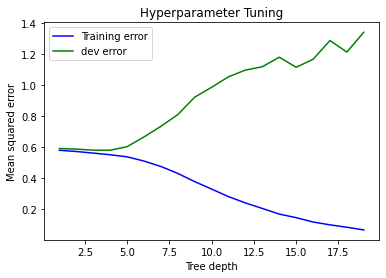

In [1386]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, Y_train)
    training_error.append(mse(Y_train, model_1.predict(X_train)))
    
dev_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, Y_train)
    y_pred = reg.predict(X_dev)
    dev_error.append(mse(Y_dev, model_2.predict(X_dev)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, dev_error, color='green', label='dev error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning')
plt.legend()

lowest for testing at around 3 and training as it goes on, but this is overfitting

In [1387]:
reg = DecisionTreeRegressor(random_state = 0,max_depth=3) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

In [1388]:
y_pred_series=pd.Series(y_pred,index=X_test.index)
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

,Actual,Prediction
760,-2.659260,-1.998695
1340,-2.659260,-2.195271
1083,-2.659260,-1.998695
271,-2.659260,-2.436026
72,-2.659260,-2.195271
...,...,...
1897,0.470004,-1.998695
1653,0.587787,-1.998695
1773,0.832909,-1.998695
372,1.131402,-2.195271


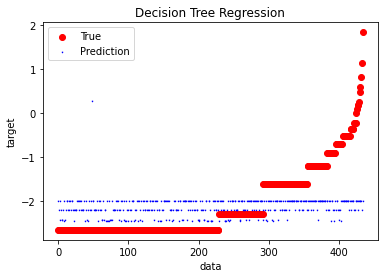

In [1389]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [1390]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.06459729283358129
R squared test set 0.02366413607459572
MSE training set 0.561214781095136
MSE test set 0.6200476194925074
RMSE training set 0.7491426974182795
RMSE test set 0.787431025228564


#Random Forest

In [1391]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
reg = RandomForestRegressor(random_state = 0)
 
#fit the regressor with x and y data
reg.fit(X_train, Y_train) 
y_pred = reg.predict(X_dev)

In [1392]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.8448830393813282
R squared dev set -0.10121134861365966
MSE training set 0.09306572498754036
MSE dev set 0.6543623096367186
RMSE training set 0.3050667549693679
RMSE dev set 0.8089266404543236


In [1393]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
2187,-2.659260,-2.155627
1497,-2.659260,-2.333124
1055,-2.659260,-2.383134
1370,-2.659260,-1.880394
530,-2.659260,-2.279565
...,...,...
836,0.262364,-2.187770
1400,0.336472,-1.622771
713,0.470004,-1.939580
1932,0.470004,-1.659950


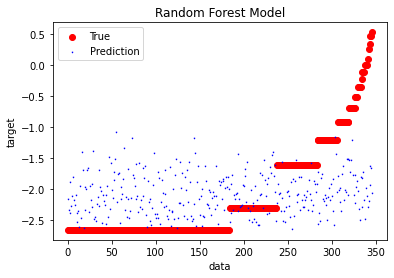

In [1394]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_dev)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

repeat process with most important features [Random Forest in Python
](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [1395]:
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SEQN                 Importance: 0.37
Variable: LBXPFHS              Importance: 0.23
Variable: LBXPFNA              Importance: 0.16
Variable: LBXPFDE              Importance: 0.08
Variable: LBXPFUA              Importance: 0.05
Variable: LBXPFHP              Importance: 0.03
Variable: LBXPFDO              Importance: 0.03
Variable: LBDPFUAL             Importance: 0.02
Variable: LBDPFDEL             Importance: 0.01
Variable: LBDPFHPL             Importance: 0.01
Variable: LBDPFDOL             Importance: 0.01
Variable: LBDPFHSL             Importance: 0.0
Variable: LBXPFBS              Importance: 0.0
Variable: LBDPFBSL             Importance: 0.0
Variable: LBDPFNAL             Importance: 0.0


In [1396]:
#make a list with everying above 0 importance in order of highest to lowest
include=[]
for i,j in feature_importances:
  if j >0:
    include.append(i)
print(include)

['SEQN', 'LBXPFHS', 'LBXPFNA', 'LBXPFDE', 'LBXPFUA', 'LBXPFHP', 'LBXPFDO', 'LBDPFUAL', 'LBDPFDEL', 'LBDPFHPL', 'LBDPFDOL']


In [1397]:
reg_important = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg_important.fit(X_train[include], Y_train) 
y_pred = reg_important.predict(X_dev[include])

In [1398]:
pred_train = reg_important.predict(X_train[include])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg_important.predict(X_dev[include])
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.8457444223884255
R squared dev set -0.08343279098830991
MSE training set 0.09254891990234711
MSE dev set 0.6437979270189957
RMSE training set 0.30421853970845875
RMSE dev set 0.8023701932518404


In [1399]:
pred_dict={}
R_train_dict={}
R_dev_dict={}
mse_train_dict={}
mse_dev_dict={}
rmse_train_dict={}
rmse_dev_dict={}
#making a loop to go through adding one at a time and evaulating
for i in range(1,len(include)+1):
  #used is a list of what will be included
  used=include[:i]
  #fit the regression
  rf = RandomForestRegressor(random_state = 0)
  rf.fit(X_dev[used], Y_dev)
  y_pred = rf.predict(X_dev[used])
  pred_dict[i]=y_pred
  pred_train = rf.predict(X_train[used])
  #R squared test
  R_train=metrics.r2_score(Y_train,pred_train)
  R_train_dict[i]=R_train
  R_dev=metrics.r2_score(Y_dev,y_pred)
  R_dev_dict[i]=R_dev
  #MSE
  mse_train = mean_squared_error(Y_train, pred_train)
  mse_train_dict[i]=mse_train
  mse_dev = mean_squared_error(Y_dev, y_pred)
  mse_dev_dict[i]=mse_dev
  #RMSE
  rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
  rmse_train_dict[i]=rmse_train
  rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
  rmse_dev_dict[i]=rmse_dev

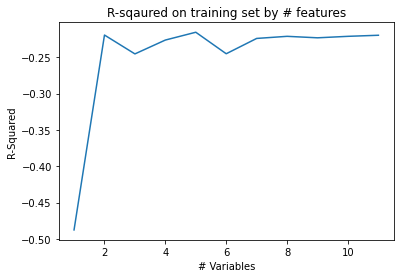

In [1400]:
# Make a graph by #vars
plt.plot([int(key) for key in R_train_dict.keys()], 
         [float(value) for value in R_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on training set by # features');

levels off around 2 features

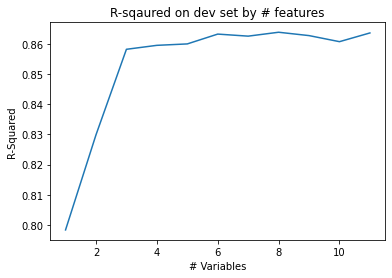

In [1401]:
#Make a graph by #vars
plt.plot([int(key) for key in R_dev_dict.keys()], 
         [float(value) for value in R_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on dev set by # features');

highest at 3-4 features

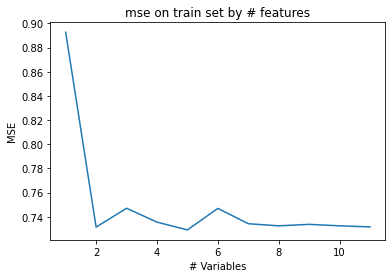

In [1402]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_train_dict.keys()], 
         [float(value) for value in mse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on train set by # features');

levels off around 3 features

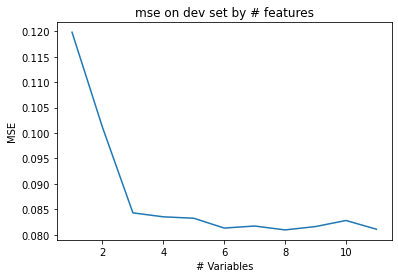

In [1403]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_dev_dict.keys()], 
         [float(value) for value in mse_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on dev set by # features');

lowest around 3-4 features

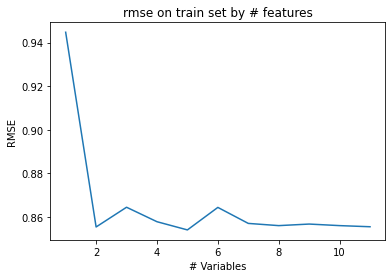

In [1404]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_train_dict.keys()], 
         [float(value) for value in rmse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on train set by # features');

levels off around 3 features

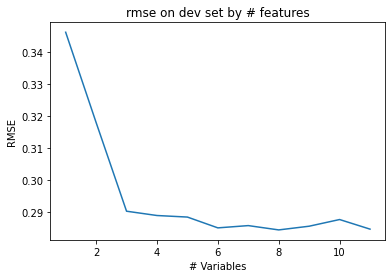

In [1405]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_dev_dict.keys()], 
         [float(value) for value in rmse_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on dev set by # features');

lowest around 3-4 features

**verdict: use 4 features**

In [1406]:
include[0:4]

['SEQN', 'LBXPFHS', 'LBXPFNA', 'LBXPFDE']

we shouldn't use SEQN, use 3

In [1407]:
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred = reg2.predict(X_test[include[0:3]])

In [1408]:
#for later use
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred_forest = reg2.predict(X_test[include[0:3]])
y_pred_series_forest=pd.Series(y_pred_forest,index=X_test.index)

In [1409]:
pred_train = reg2.predict(X_train[include[0:3]])
#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg2.predict(X_test[include[0:3]])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.8393587283662974
R squared test set -0.11302014129760751
MSE training set 0.0963801530656819
MSE test set 0.7068525438409214
RMSE training set 0.3104515309443358
RMSE test set 0.8407452312329351


In [1410]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
760,-2.659260,-2.031415
1340,-2.659260,-2.212076
1083,-2.659260,-2.273776
271,-2.659260,-2.072615
72,-2.659260,-1.979399
...,...,...
1897,0.470004,-1.743624
1653,0.587787,-1.883341
1773,0.832909,-1.689626
372,1.131402,-2.577057


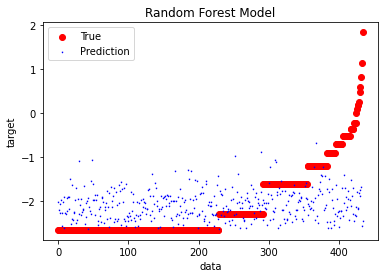

In [1411]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

# Ordinary Least Squares Regression

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[OLS Linear Regression Basics with Python’s Scikit-learn](https://python.plainenglish.io/ols-linear-regression-basics-with-pythons-scikit-learn-4ecfe88145b)

In [1412]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_dev)

In [1413]:
reg.coef_

array([ 6.16665529e-07,  6.14077927e-02, -6.12465054e-02,  1.31176082e-01,
        2.40037913e-01,  9.37372076e-01,  9.61976429e-01,  6.79339592e-02,
       -9.82377712e-02,  3.83988313e-02, -1.26024115e-01, -8.88368636e-02,
       -5.83881968e-02,  2.29123586e-03,  1.16359189e-01])

In [1414]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.05594826247119977
R squared dev set 0.03877558474838594
MSE training set 0.5664039511117731
MSE dev set 0.5711792102715789
RMSE training set 0.7525981338747613
RMSE dev set 0.7557639911186421


In [1415]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
2187,-2.659260,-2.195649
1497,-2.659260,-2.171651
1055,-2.659260,-2.299963
1370,-2.659260,-2.177572
530,-2.659260,-1.878619
...,...,...
836,0.262364,-2.178729
1400,0.336472,-1.766038
713,0.470004,-2.041309
1932,0.470004,-2.043769


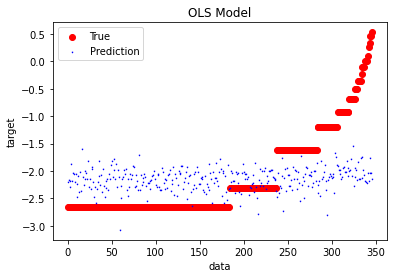

In [1416]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

In [1417]:
bic_dict={}
for i in X_train.columns:
  reg1 = sm.OLS(Y_train, sm.add_constant(X_train[i])).fit()
  bic_dict[i]=reg1.bic
sorted(bic_dict.items(), key=lambda x: x[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[('LBXPFHS', 3187.7872347345997),
 ('LBXPFNA', 3210.2994314322677),
 ('LBDPFDEL', 3221.0365712568405),
 ('LBXPFDE', 3227.3236666529015),
 ('LBDPFHPL', 3231.196775065687),
 ('LBXPFHP', 3233.8903635607776),
 ('LBDPFUAL', 3234.9426868471232),
 ('LBDPFNAL', 3235.607237089446),
 ('LBDPFHSL', 3237.638940376003),
 ('LBDPFDOL', 3238.110406788633),
 ('LBXPFDO', 3239.248251314655),
 ('LBXPFUA', 3239.768354170857),
 ('LBDPFBSL', 3241.584470258006),
 ('LBXPFBS', 3241.999361234817),
 ('SEQN', 3242.01375817074)]

In [1418]:
used_OLS=list(np.asarray(sorted(bic_dict.items(), key=lambda x: x[1])[0:5])[:,0])
used_OLS

['LBXPFHS', 'LBXPFNA', 'LBDPFDEL', 'LBXPFDE', 'LBDPFHPL']

In [1419]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred=reg.predict(X_dev[used_OLS])

In [1420]:
pred_train = reg.predict(X_train[used_OLS])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train[used_OLS])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev[used_OLS])
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.046794320131222866
R squared dev set 0.03742921498969243
MSE training set 0.5718960538255337
MSE dev set 0.5719792507234257
RMSE training set 0.7562380933446382
RMSE dev set 0.7562930984237697


In [1421]:
print(list(X_dev[used_OLS].index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev[used_OLS].index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
2187,-2.659260,-2.205483
1497,-2.659260,-2.102853
1055,-2.659260,-2.312086
1370,-2.659260,-2.070381
530,-2.659260,-1.946186
...,...,...
836,0.262364,-2.111034
1400,0.336472,-1.871694
713,0.470004,-2.052001
1932,0.470004,-2.111974


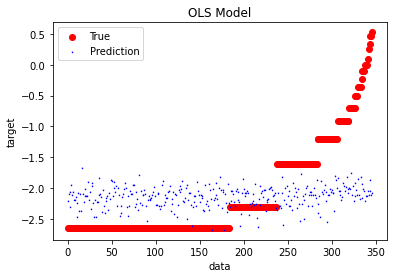

In [1422]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

In [1423]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred=reg.predict(X_test[used_OLS])

In [1424]:
pred_train = reg.predict(X_train[used_OLS])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared testing set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train[used_OLS])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test[used_OLS])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.046794320131222866
R squared testing set 0.03679204471678066
MSE training set 0.5718960538255337
MSE test set 0.6117103978423931
RMSE training set 0.7562380933446382
RMSE test set 0.7821191711257263


In [1425]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
760,-2.659260,-2.020438
1340,-2.659260,-2.201748
1083,-2.659260,-2.161663
271,-2.659260,-2.299490
72,-2.659260,-2.262641
...,...,...
1897,0.470004,-2.126173
1653,0.587787,-2.000879
1773,0.832909,-2.114152
372,1.131402,-2.144310


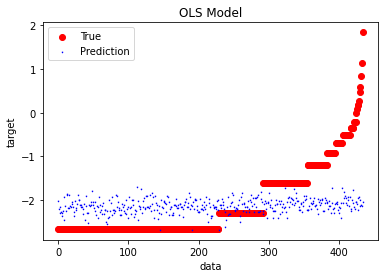

In [1426]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

#Neural Network

[sklearn.neural_network.MLPRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [1427]:
from collections import defaultdict

In [1428]:
labels=Y_train
data=X_train_scaled
dev_labels=Y_dev
dev_data=X_dev_scaled

<BarContainer object of 16 artists>

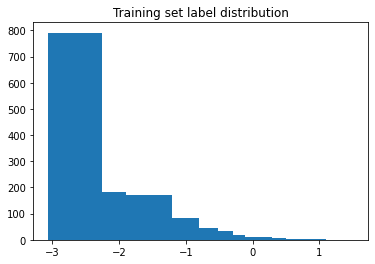

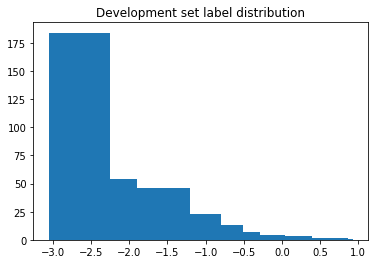

In [1429]:
counts = defaultdict(int)
for label in labels:
 counts[label] += 1

plt.figure()
plt.title("Training set label distribution")
k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))
dev_counts = defaultdict(int)
for label in dev_labels:
 dev_counts[label] += 1
plt.figure()
plt.title("Development set label distribution")
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

In [1430]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [1431]:
reg = MLPRegressor(random_state=0, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [1432]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.25002711304364844
R squared dev set -0.029654515317199204
MSE training set 0.4499622102393744
MSE dev set 0.6118417755311544
RMSE training set 0.6707922258340315
RMSE dev set 0.7822031548972136


In [1433]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
2187,-2.659260,-2.229065
1497,-2.659260,-2.480700
1055,-2.659260,-2.347299
1370,-2.659260,-1.875205
530,-2.659260,-1.925745
...,...,...
836,0.262364,-2.308367
1400,0.336472,-1.401069
713,0.470004,-2.138084
1932,0.470004,-1.989189


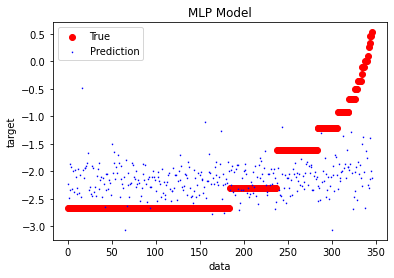

In [1434]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

##Improving model

switch to logistic activation function since logistic regression performed well in classification exercise

In [1435]:
reg = MLPRegressor(random_state=0, activation='logistic', max_iter=500).fit(X_train_scaled, Y_train) #default activation is relu
y_pred=reg.predict(X_dev_scaled)

In [1436]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.055112774132602405
R squared dev set 0.034212657694583704
MSE training set 0.5669052201389644
MSE dev set 0.5738905948658158
RMSE training set 0.7529310859162108
RMSE dev set 0.7575556711330302


**Previously:**

R squared training set 0.762802193930793

R squared dev set 0.7429196693345931

MSE training set 0.16005593222351716

MSE dev set 0.20521936210051822

RMSE training set 0.40006990917028135

RMSE dev set 0.4530114370526623


improved

In [1437]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
2187,-2.659260,-2.196902
1497,-2.659260,-2.154846
1055,-2.659260,-2.300968
1370,-2.659260,-2.202757
530,-2.659260,-1.879820
...,...,...
836,0.262364,-2.151513
1400,0.336472,-1.770568
713,0.470004,-2.018081
1932,0.470004,-2.033233


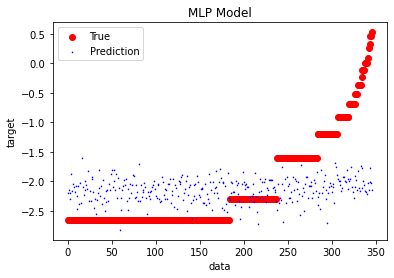

In [1438]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

###DO NOT RUN, THIS CELL WILL TAKE 5 MINUTES OR MORE, trying out 50 different alphas

[How to Tune Algorithm Parameters with Scikit-Learn](https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/)

In [1439]:
from sklearn.model_selection import GridSearchCV
model = MLPRegressor(random_state=0, activation='logistic', max_iter=500)
#alphas = np.array(np.linspace(0,1))
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=np.linspace(0,1)))
grid.fit(X_train_scaled, Y_train)
#print(grid)
# summarize the results of the grid search
#print(grid.best_score_)
print(grid.best_estimator_.alpha)

1.0


In [1440]:
grid.best_estimator_.alpha

1.0

In [1441]:
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

### CONTINUE

In [1442]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.24489795918367346, max_iter=500).fit(X_train_scaled, Y_train) #default alpha is 0.0001
#y_pred=reg.predict(X_dev_scaled)

In [1443]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.05482282899342139
R squared dev set 0.036690156910291094
MSE training set 0.5670791789019319
MSE dev set 0.5724184141523184
RMSE training set 0.7530465980946544
RMSE dev set 0.7565833821544843


**Previously:**

R squared training set 0.7007457103530312

R squared dev set 0.7522622219666578

MSE training set 0.20193030068480913

MSE dev set 0.19776148818779868

RMSE training set 0.4493665549246062

RMSE dev set 0.4447038207479206

barely improved

In [1444]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
2187,-2.659260,-2.195324
1497,-2.659260,-2.142147
1055,-2.659260,-2.291438
1370,-2.659260,-2.191732
530,-2.659260,-1.903191
...,...,...
836,0.262364,-2.138223
1400,0.336472,-1.782495
713,0.470004,-2.031154
1932,0.470004,-2.050725


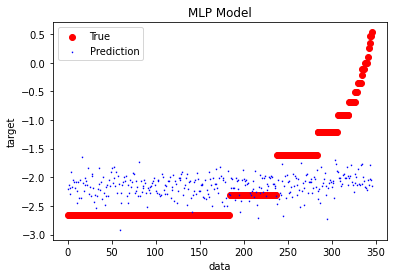

In [1445]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

let's try changing the learning rate

In [1446]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.24489795918367346, learning_rate='adaptive', max_iter=500).fit(X_train_scaled, Y_train) #default learning rate is constant
#y_pred=reg.predict(X_dev_scaled)

In [1447]:
#if had time to run
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, learning_rate='adaptive', max_iter=500).fit(X_train_scaled, Y_train) #default learning rate is constant
y_pred=reg.predict(X_dev_scaled)

In [1448]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.05482282899342139
R squared dev set 0.036690156910291094
MSE training set 0.5670791789019319
MSE dev set 0.5724184141523184
RMSE training set 0.7530465980946544
RMSE dev set 0.7565833821544843


**previously:**

R squared training set 0.7002847931885834

R squared dev set 0.750333393721629

MSE training set 0.20224131758524366

MSE dev set 0.19930121275957643

RMSE training set 0.4497124832437317

RMSE dev set 0.4464316439944378

no change

we are working with a large dataset, but maybe not too large to try out LBFGS for the solver.

In [1449]:
len(X_train_scaled)

1387

In [1450]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.24489795918367346, solver='lbfgs', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
#y_pred=reg.predict(X_dev_scaled)

In [1451]:
#if had time to run 
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='lbfgs', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
y_pred=reg.predict(X_dev_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [1452]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.10877412581022194
R squared dev set 0.032764710566103195
MSE training set 0.5347099490495186
MSE dev set 0.5747509946686485
RMSE training set 0.7312386402875046
RMSE dev set 0.7581233373723886


**previously:**

R squared training set 0.7002847931885834

R squared dev set 0.750333393721629

MSE training set 0.20224131758524366

MSE dev set 0.19930121275957643

RMSE training set 0.4497124832437317

RMSE dev set 0.4464316439944378

horrible idea okay

In [1453]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.24489795918367346, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
#y_pred=reg.predict(X_dev_scaled)

In [1454]:
#if had time to run 
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
y_pred=reg.predict(X_dev_scaled)

In [1455]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.045190810278375015
R squared dev set 0.04983162572569444
MSE training set 0.5728581137214003
MSE dev set 0.5646094845613802
RMSE training set 0.7568739087334166
RMSE dev set 0.7514050070111192


**previously:**

R squared training set 0.7002847931885834

R squared dev set 0.750333393721629

MSE training set 0.20224131758524366

MSE dev set 0.19930121275957643

RMSE training set 0.4497124832437317

RMSE dev set 0.4464316439944378

worse. I think I know which performed best thus far

##best performing:

###if did not have time

In [1456]:
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.4081632653061224, max_iter=500).fit(X_train_scaled, Y_train)
#dev_pred=reg.predict(X_dev_scaled)
#y_pred=reg.predict(X_test_scaled)

###if had time to run long cell:

In [1457]:
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
dev_pred=reg.predict(X_dev_scaled)
y_pred=reg.predict(X_test_scaled)

### continue

In [1458]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,dev_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, dev_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, dev_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.05482282899342139
R squared dev set 0.036690156910291094
MSE training set 0.5670791789019319
MSE dev set 0.5724184141523184
RMSE training set 0.7530465980946544
RMSE dev set 0.7565833821544843


In [1459]:
print(list(X_dev.index)==list(Y_dev.index))
dev_pred_series=pd.Series(dev_pred,index=X_dev.index)
print(list(dev_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=dev_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
2187,-2.659260,-2.195324
1497,-2.659260,-2.142147
1055,-2.659260,-2.291438
1370,-2.659260,-2.191732
530,-2.659260,-1.903191
...,...,...
836,0.262364,-2.138223
1400,0.336472,-1.782495
713,0.470004,-2.031154
1932,0.470004,-2.050725


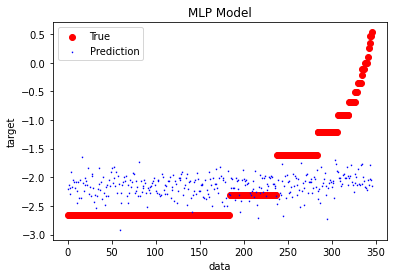

In [1460]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

In [1461]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared testing set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.05482282899342139
R squared testing set 0.05736717946550396
MSE training set 0.5670791789019319
MSE test set 0.5986436205241955
RMSE training set 0.7530465980946544
RMSE test set 0.7737206346764932


In [1462]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
760,-2.659260,-2.029608
1340,-2.659260,-2.287897
1083,-2.659260,-2.153789
271,-2.659260,-2.301696
72,-2.659260,-2.243895
...,...,...
1897,0.470004,-2.106870
1653,0.587787,-1.989521
1773,0.832909,-2.098114
372,1.131402,-2.145800


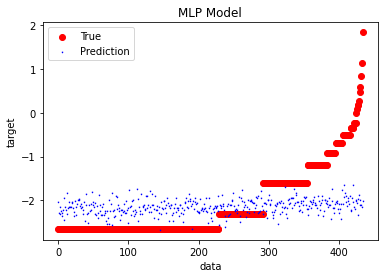

In [1463]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

# All plots

In [1464]:
test_DF= pd.DataFrame(columns = ['Actual', 'Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
test_DF['Actual']=Y_test
#lasso
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred_lasso=reg.predict(X_test_scaled)
y_pred_series_lasso=pd.Series(y_pred_lasso,index=X_test.index)
test_DF['Lasso']=y_pred_series_lasso

#Decision Tree
reg = DecisionTreeRegressor(random_state = 0,max_depth=6) 
reg.fit(X_train, Y_train)
y_pred_tree = reg.predict(X_test)
y_pred_series_tree=pd.Series(y_pred_tree,index=X_test.index)
test_DF['Decision Tree']=y_pred_series_tree

#Random Forest 
#y_pred_forest
#y_pred_series_forest
test_DF['Random Forest']=y_pred_series_forest

#OLS
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred_OLS=reg.predict(X_test[used_OLS])
y_pred_series_OLS=pd.Series(y_pred_OLS,index=X_test.index)
test_DF['OLS']=y_pred_series_OLS

#Neural Newtwork
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
y_pred_NN=reg.predict(X_test_scaled)
y_pred_series_NN=pd.Series(y_pred_NN,index=X_test.index)
test_DF['Neural Network']=y_pred_NN

In [1465]:
test_DF

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
641,-0.356675,-2.207668,-2.004870,-1.529414,-2.239088,-2.237325
1448,-2.659260,-2.424130,-2.462293,-2.308108,-2.364582,-2.474219
1968,-1.203973,-1.997887,-2.004870,-1.432119,-2.002010,-1.985202
1019,-1.203973,-2.047643,-2.004870,-2.473169,-2.048802,-2.026266
2037,-2.659260,-2.155489,-2.424725,-2.305436,-2.166896,-2.144844
...,...,...,...,...,...,...
1249,1.840550,-2.037783,-2.004870,-2.462873,-2.038631,-2.016262
2067,-2.302585,-2.201202,-2.004870,-2.543735,-2.232203,-2.225285
1529,-2.659260,-2.216003,-2.617298,-2.411962,-2.247964,-2.251265
389,-2.302585,-1.918442,-2.004870,-2.152274,-1.919621,-1.936315


In [1466]:
test_DF.to_csv('test_pfas_run1.csv')

In [1467]:
plot_df=test_DF.copy()
plot_df=plot_df.sort_values(by=["Actual"])

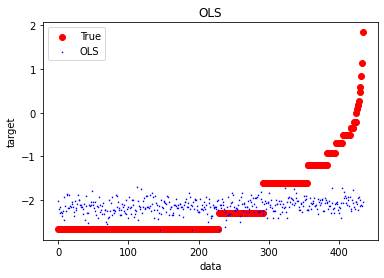

In [1468]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['OLS'], color="blue", label="OLS",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS")
plt.legend()
plt.show()

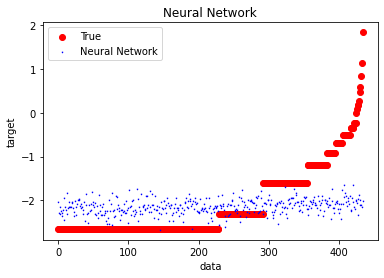

In [1469]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Neural Network'], color="blue", label="Neural Network",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Neural Network")
plt.legend()
plt.show()

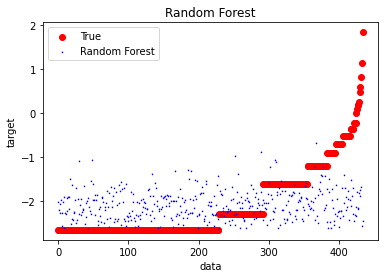

In [1470]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Random Forest'], color="blue", label="Random Forest",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest")
plt.legend()
plt.show()

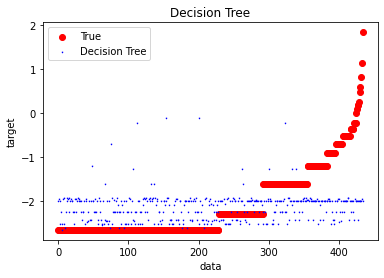

In [1471]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Decision Tree'], color="blue", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree")
plt.legend()
plt.show()

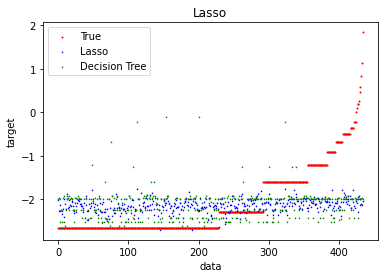

In [1472]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True", s=1)
plt.scatter(range(len(plot_df)), plot_df['Lasso'], color="blue", label="Lasso",marker="v",s=0.5)
plt.scatter(range(len(plot_df)), plot_df['Decision Tree'], color="g", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso")
plt.legend()
plt.show()

doing a difference instead of got it or not since it is never actually exact

In [1473]:
diff_df=pd.DataFrame(columns = ['Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
for i in diff_df.columns:
  diff_df[i]= abs((test_DF['Actual']-test_DF[i]))
display(diff_df)

,Lasso,Decision Tree,Random Forest,OLS,Neural Network
641,1.850993,1.648195,1.172739,1.882413,1.880650
1448,0.235130,0.196967,0.351152,0.294679,0.185041
1968,0.793914,0.800898,0.228146,0.798037,0.781229
1019,0.843670,0.800898,1.269196,0.844830,0.822294
2037,0.503771,0.234535,0.353824,0.492364,0.514416
...,...,...,...,...,...
1249,3.878332,3.845420,4.303422,3.879180,3.856812
2067,0.101383,0.297715,0.241150,0.070382,0.077300
1529,0.443257,0.041962,0.247298,0.411296,0.407995
389,0.384143,0.297715,0.150311,0.382965,0.366270


In [1474]:
diff_dict={}
for i in diff_df.columns:
  x= np.mean(diff_df[i])
  diff_dict[i]=x
  print(" average difference from actual = {:.3f} ".format(x) + i)

 average difference from actual = 0.613 Lasso
 average difference from actual = 0.634 Decision Tree
 average difference from actual = 0.650 Random Forest
 average difference from actual = 0.618 OLS
 average difference from actual = 0.606 Neural Network


In [1475]:
performance=list(np.asarray(sorted(diff_dict.items(), key=lambda x: x[1]))[:,0])
print(performance)

['Neural Network', 'Lasso', 'OLS', 'Decision Tree', 'Random Forest']


now lets look at rounding all the predictions to the fixed values for detection levels

In [1476]:
levels=Y_train.value_counts().index.tolist()
levels

[-2.659260036932778,
 -2.3025850929940455,
 -1.6094379124341003,
 -1.2039728043259361,
 -0.916290731874155,
 -0.6931471805599453,
 -0.5108256237659907,
 -0.10536051565782628,
 -0.35667494393873245,
 0.0,
 -0.2231435513142097,
 0.09531017980432493,
 0.26236426446749106,
 0.4054651081081644,
 0.5306282510621704,
 0.5877866649021191,
 0.1823215567939546,
 0.6931471805599453,
 0.3364722366212129,
 1.0647107369924282,
 0.7884573603642703,
 0.47000362924573563,
 1.0986122886681098]

In [1477]:
group_df=test_DF.copy()
for i in group_df.drop(columns="Actual").columns:
  for j,k in zip(group_df[i],group_df[i].index):
    dict1={}
    for a in levels:
      dict1[a]=abs(a-j)
    b=min(dict1, key=dict1.get)
    group_df[i][k]=b

In [1478]:
group_df

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
641,-0.356675,-2.302585,-2.302585,-1.609438,-2.302585,-2.302585
1448,-2.659260,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
1968,-1.203973,-2.302585,-2.302585,-1.609438,-2.302585,-2.302585
1019,-1.203973,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
2037,-2.659260,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
...,...,...,...,...,...,...
1249,1.840550,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
2067,-2.302585,-2.302585,-2.302585,-2.659260,-2.302585,-2.302585
1529,-2.659260,-2.302585,-2.659260,-2.302585,-2.302585,-2.302585
389,-2.302585,-1.609438,-2.302585,-2.302585,-1.609438,-1.609438


In [1479]:
match_df=group_df.copy()
for i in match_df.columns:
  match_df[i]= (match_df['Actual'] == match_df[i])
display(match_df)

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
641,True,False,False,False,False,False
1448,True,False,False,False,False,False
1968,True,False,False,False,False,False
1019,True,False,False,False,False,False
2037,True,False,False,False,False,False
...,...,...,...,...,...,...
1249,True,False,False,False,False,False
2067,True,False,False,False,False,False
1529,True,False,False,False,False,False
389,True,False,False,False,False,False


:(( okay let's do difference again

In [1480]:
diff_group_df=pd.DataFrame(columns = ['Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
for i in diff_group_df.columns:
  diff_group_df[i]= abs((group_df['Actual']-group_df[i]))
display(diff_group_df)

,Lasso,Decision Tree,Random Forest,OLS,Neural Network
641,1.945910,1.945910,1.252763,1.945910,1.945910
1448,0.356675,0.356675,0.356675,0.356675,0.356675
1968,1.098612,1.098612,0.405465,1.098612,1.098612
1019,1.098612,1.098612,1.098612,1.098612,1.098612
2037,0.356675,0.356675,0.356675,0.356675,0.356675
...,...,...,...,...,...
1249,4.143135,4.143135,4.143135,4.143135,4.143135
2067,0.000000,0.000000,0.356675,0.000000,0.000000
1529,0.356675,0.000000,0.356675,0.356675,0.356675
389,0.693147,0.000000,0.000000,0.693147,0.693147


In [1481]:
diff_dict_levels={}
for i in diff_group_df.columns:
  x= np.mean(diff_group_df[i])
  diff_dict_levels[i]=x
  print(" average difference from actual = {:.3f} ".format(x) + i)

 average difference from actual = 0.587 Lasso
 average difference from actual = 0.622 Decision Tree
 average difference from actual = 0.631 Random Forest
 average difference from actual = 0.603 OLS
 average difference from actual = 0.591 Neural Network


In [1482]:
performance_levels=list(np.asarray(sorted(diff_dict_levels.items(), key=lambda x: x[1]))[:,0])
print(performance_levels)

['Lasso', 'Neural Network', 'OLS', 'Decision Tree', 'Random Forest']


In [1483]:
plotting_df=group_df.copy()
plotting_df=plotting_df.sort_values(by=["Actual"])

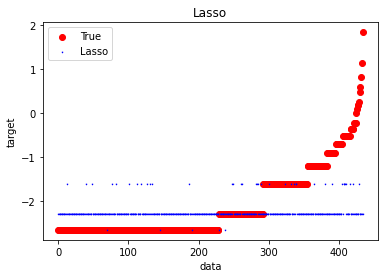

In [1484]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Lasso'], color="blue", label="Lasso",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso")
plt.legend()
plt.show()

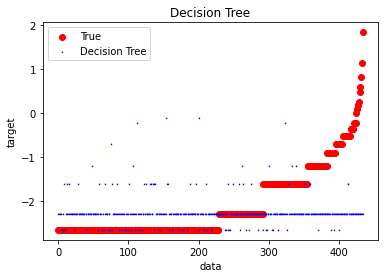

In [1485]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Decision Tree'], color="blue", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree")
plt.legend()
plt.show()

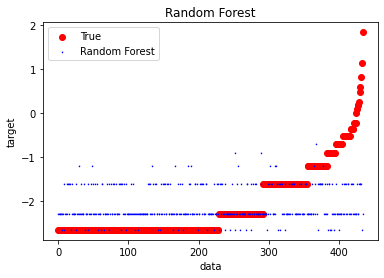

In [1486]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Random Forest'], color="blue", label="Random Forest",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest")
plt.legend()
plt.show()

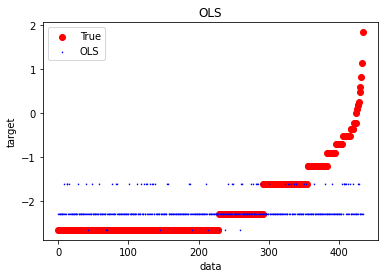

In [1487]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['OLS'], color="blue", label="OLS",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS")
plt.legend()
plt.show()

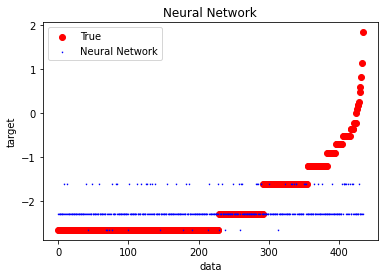

In [1488]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Neural Network'], color="blue", label="Neural Network",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Neural Network")
plt.legend()
plt.show()

#**make a table or plot: take the 125 that are -1.609438 take the means and stdvs for those predictions. for each one of the numbers. summarize in table: if this is the actual value... here is my prediction mean and std (if plot could do an error bar, but table preferred)**

In [ ]:
explore_Df=test_DF.copy()
display(explore_Df)

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
1625,-0.510826,-1.367684,-1.389134,-1.403504,-1.270777,-1.368750
2184,-2.302585,-2.331235,-2.345133,-2.332121,-2.232869,-2.352725
508,-1.203973,-1.551410,-1.643272,-1.567850,-1.447147,-1.550086
630,-0.916291,-0.841924,-0.898646,-1.143829,-0.781945,-0.824919
2003,-0.693147,-1.458902,-1.436151,-1.464852,-1.367689,-1.473335
...,...,...,...,...,...,...
52,-1.203973,-1.306298,-1.389134,-1.403504,-1.281414,-1.286272
310,0.470004,0.559640,0.391283,0.079915,0.663318,0.380753
899,-1.203973,-1.281744,-1.389134,-1.295064,-1.262857,-1.248999
42,-1.609438,-1.769840,-1.887980,-1.626530,-1.651976,-1.771870


In [ ]:
# explore_Df=explore_Df.drop(explore_Df.index[explore_Df['Actual'] != -1.6094379124341003])
#not working, just find an index where it is that to compare

In [ ]:
sr=Y_train.value_counts()
sr_dex=sr.index
sr

-1.609438    386
-2.659260    291
-2.302585    271
-1.203973    177
-0.916291     87
-0.693147     47
-0.510826     32
-0.223144     20
-0.356675     18
-0.105361     12
 0.000000      6
 0.095310      5
 0.336472      5
 0.530628      3
 0.262364      3
 0.182322      3
 1.280934      2
 0.587787      2
 0.916291      2
 0.470004      2
 0.832909      2
 0.405465      2
 1.589235      1
 0.741937      1
 3.937691      1
 0.993252      1
 1.252763      1
 0.955511      1
 1.504077      1
 0.875469      1
 1.568616      1
Name: LBXPFDE, dtype: int64

i care about the first 8

**will have to rewrite numbers on left side each time**

In [ ]:
df386 = pd.DataFrame([[sr_dex[0], sr.values[0], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df291 = pd.DataFrame([[sr_dex[1], sr.values[1], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df271 = pd.DataFrame([[sr_dex[2], sr.values[2], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df177 = pd.DataFrame([[sr_dex[3], sr.values[3], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df87 = pd.DataFrame([[sr_dex[4], sr.values[4], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df47 = pd.DataFrame([[sr_dex[5], sr.values[5], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df32 = pd.DataFrame([[sr_dex[6], sr.values[6], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df20 = pd.DataFrame([[sr_dex[7], sr.values[7], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])

**will have to rewrite numbers on left side each time**

In [ ]:
Df386 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[0]].tolist()[0]]]
Df291 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[1]].tolist()[0]]]
Df271 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[2]].tolist()[0]]]
Df177 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[3]].tolist()[0]]]
Df87 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[4]].tolist()[0]]]
Df47 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[5]].tolist()[0]]]
Df32 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[6]].tolist()[0]]]
Df20 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[7]].tolist()[0]]]

**will have to rewrite numbers on left side each time**

In [ ]:
L1=['Lasso', 'Decision Tree', 'Random Forest', 'OLS', 'Neural Network']

L2=[Df386, Df291, Df271, Df177, Df87, Df47, Df32, Df20]
L3=[df386, df291, df271, df177, df87, df47, df32, df20]

for old,new in zip(L2,L3):
  for col in L1:
    new[col+' mean']=np.average(old[col])
    new[col+' std']=np.std(old[col])

In [ ]:
concatenated_dataframes = pd.concat(L3, axis=0)
display(concatenated_dataframes)

,detection level,no of samples in training,Lasso mean,Lasso std,Decision Tree mean,Decision Tree std,Random Forest mean,Random Forest std,OLS mean,OLS std,Neural Network mean,Neural Network std
0,-1.609438,386,-1.798704,0.334355,-1.696466,0.325980,-1.715084,0.351016,-1.748926,0.341900,-1.793270,0.344050
0,-2.659260,291,-2.359123,0.259486,-2.382631,0.284380,-2.376379,0.243689,-2.324763,0.271725,-2.363956,0.259658
0,-2.302585,271,-2.120385,0.292427,-2.094295,0.355965,-2.067845,0.380801,-2.067308,0.287083,-2.126217,0.298069
0,-1.203973,177,-1.432988,0.345464,-1.380781,0.355779,-1.375059,0.317134,-1.378484,0.361405,-1.422555,0.347183
0,-0.916291,87,-1.213180,0.387061,-1.228297,0.354845,-1.203940,0.381973,-1.165094,0.388946,-1.202124,0.388218
0,-0.693147,47,-1.037574,0.328804,-1.032486,0.326606,-0.983064,0.364136,-0.972088,0.345404,-1.032880,0.320439
0,-0.510826,32,-0.807565,0.403537,-0.665844,0.494615,-0.697331,0.474644,-0.710555,0.399018,-0.833529,0.386111
0,-0.223144,20,-0.375435,0.200679,-0.421865,0.202683,-0.309633,0.380036,-0.346543,0.325078,-0.398083,0.166222


In [ ]:
concatenated_dataframes.to_csv('levels_breakdown_pfas_run10.csv')